# Scraping representatives from the EPO register

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

In [13]:
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
import random

driver = webdriver.Chrome()
representatives_text = list()

for page in range(1,101):
    driver.get(f'https://www.epo.org/en/applying/representatives?current=n_{page}_n&size=n_100_n')
    driver.implicitly_wait(2 + random.uniform(0, 1))

    representatives = driver.find_elements(By.CLASS_NAME, "professional-representative")
    for i in range(len(representatives)):
        representatives_text.append(representatives[i].text)

## Extractors

In [15]:
def name_extractor(representative_info):
    name_data = representative_info[0]
    return name_data[:-5]

In [16]:
def email_extractor(representative_info):
    email = [element[6:] for element in representative_info if element.startswith("Email:")]

    if len(email)==0:
        return None

    return email[0]

In [17]:
def url_extractor(representative_info):
    url = [element[4:] for element in representative_info if element.startswith("Url:")]

    if len(url)==0:
        return None

    return url[0]

In [ ]:
def company_extractor(representative_info):
    if len(representative_info) >= 2 and not representative_info[1].startswith("Url:") and not representative_info[1].startswith("Email:"):
        return representative_info[1]
    else:
        return None

In [ ]:
def region_extractor(representative_info):
    return representative_info[0][-3:-1]

In [ ]:
def extractor(representative_info):
    name = name_extractor(representative_info)
    email = email_extractor(representative_info)
    company = company_extractor(representative_info)
    url = url_extractor(representative_info)
    region = region_extractor(representative_info)
    return name,email,company,url,region


In [ ]:
def dict_adder(dict_to_add,representative_info_text):
    representative_info = representative_info_text.split("\n")
    name,email,company,url,region = extractor(representative_info)
    dict_to_add["name"].append(name)
    dict_to_add["email"].append(email)
    dict_to_add["company"].append(company)
    dict_to_add["url"].append(url)
    dict_to_add["region"].append(region)

In [ ]:
len(representatives_text)

10000

In [ ]:
representatives_dict = {"name":[],"email":[],"company":[],"url":[],"region":[]}
for representative in representatives_text:
    dict_adder(representatives_dict,representative)

In [ ]:
import pandas as pd
df = pd.DataFrame(representatives_dict)

In [20]:
df.head(34)

,name,email,company,url,region
0,"'t Hoen-van der Hoogt, Cornelia Catharina",patents@byondis.com,Byondis B.V.,http://www.byondis.com,NL
1,"'t Jong, Bastiaan Jacob",btjong@inaday.eu,Inaday,NaN,NL
2,"Aagaard, Louise Yung",lad@hoiberg.com,Høiberg P/S,http://www.hoiberg.com,DK
3,"Aalbers, Arnt Reinier",a.aalbers@dvme.nl,De Vries & Metman,NaN,NL
4,"Aalto, Juha-Matti",posti@laineip.fi,Laine IP Oy,http://www.laineip.fi,FI
5,"Aaltonen, Janne Lari Antero",janne@moosedog.fi,Moosedog Oy,http://www.moosedog.fi,FI
6,"Aamand, Jesper L.",jln@jlipr.com,Jesper Levin A/S,http://www.jlipr.com,DK
7,"Abaléa, Jordan",jordan.abalea@hoyngrokh.com,Hoyng Rokh Monegier,http://www.hoyngrokhmonegier.com,FR
8,"Abawi, Christian Farid",christian.abawi@mitscherlich.de,Mitscherlich PartmbB,http://www.mitscherlich.de,DE
9,"Abbas, Gabor",gabor.abbas@sibelco.com,Ankerpoort NV,http://www.sibelco.com,NL


In [ ]:
df.to_csv('representatives_scraped.txt', sep='\t', index=False)

## Data cleaning and missing values

In [ ]:
df.isnull().sum()

name          0
email      1960
company     240
url        4737
region        0
dtype: int64

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
import missingno as msno

<Axes: >

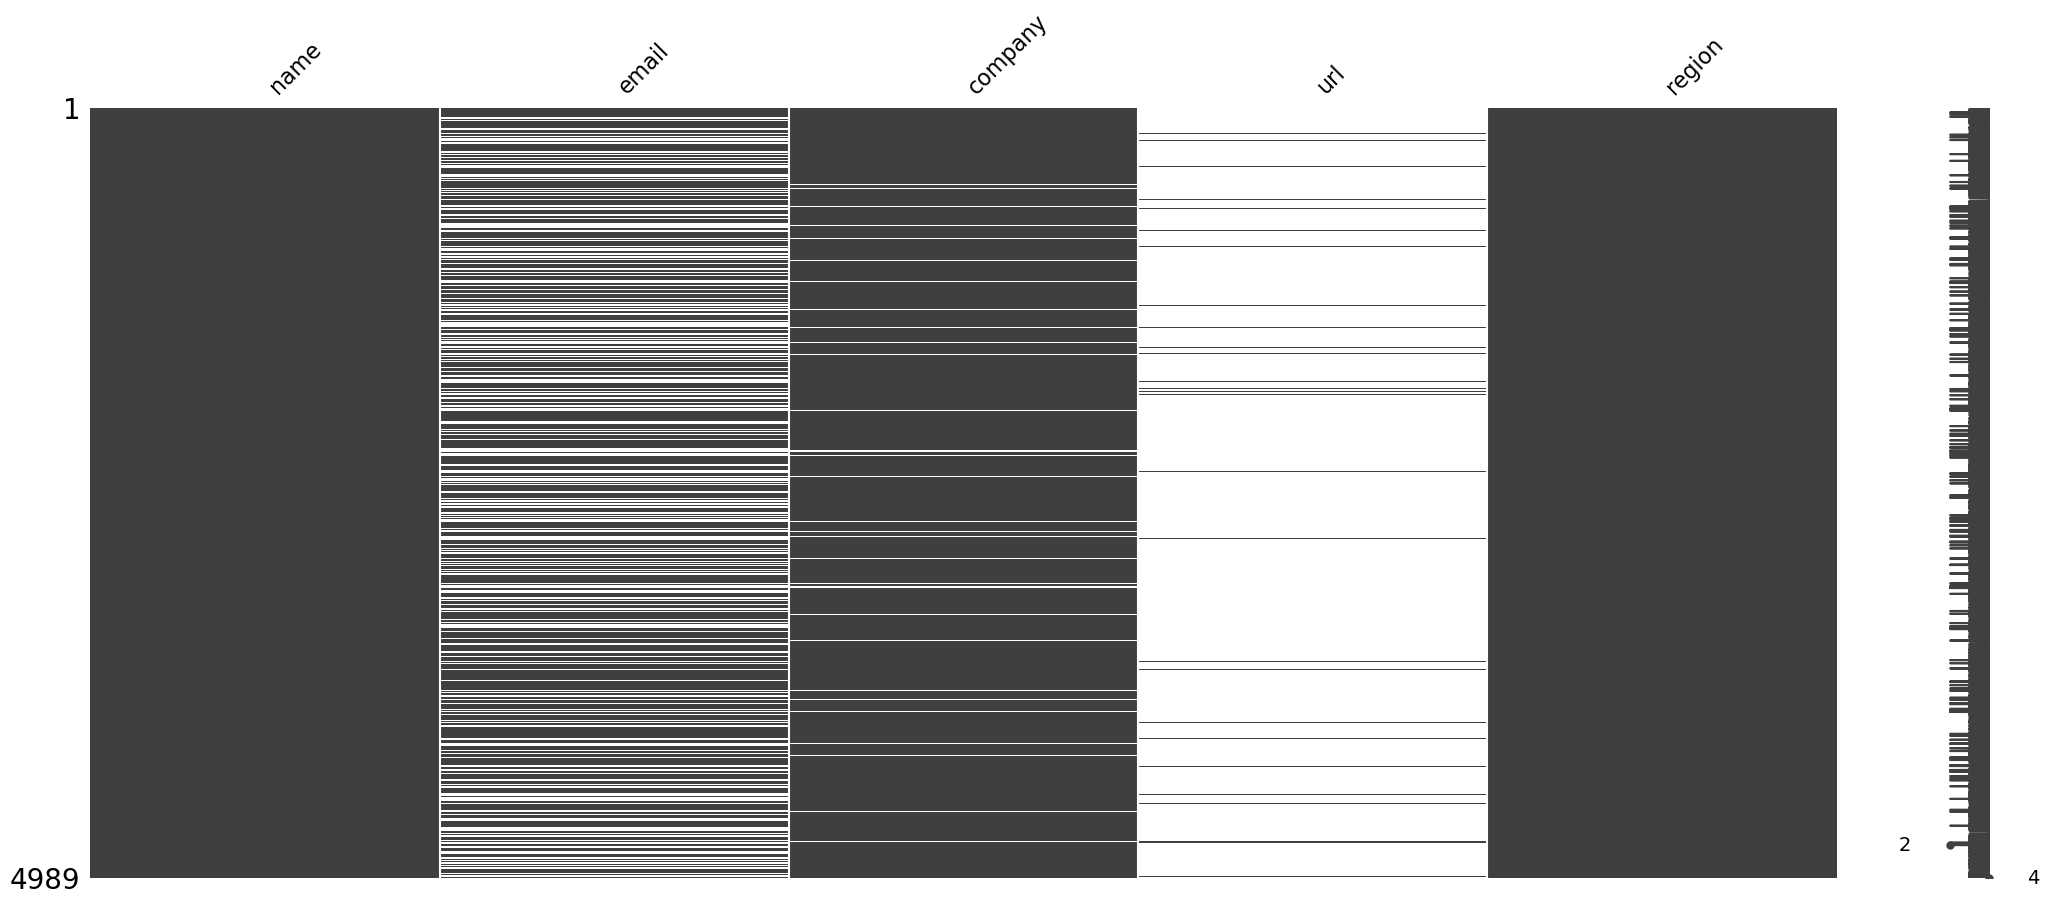

In [ ]:
msno.matrix(null_data)

To clear out the freelancers, or atleast classify them as such, the easyest method is to search for each company in its corresponding national register. This however is impossible because most registers do have a captcha security measure in place, making it almost impossible to check in an automated way. The other option is to check google search results, which poses a challenge in a different way because there is no way to see if the company that is found is related with IP (and there are a bunch of regions so the different languages for the sites do not help our case). The third and final option is to check the emails. This seems as an ok option since its relatively easy to implement and snuffs out most people that have an email. This method involves scraping the most popular 100 email domains, and if the persons email domain is in the list they are a freelancer.

In [ ]:
url_for_mail_scraping = 'https://www.gmass.co/domains'

In [ ]:
driver.get(url_for_mail_scraping)
driver.implicitly_wait(2 + random.uniform(0, 1))
mail_list = driver.find_elements(By.CSS_SELECTOR, "html body div#page-wrap.page-wrap div.container div#status-details ul#status-items li a")

In [ ]:
mail_domains = [mail.text.split()[-1] for mail in mail_list]

In [ ]:
freelancers = []
count_of_email_catches= 0


for index, row in null_data.iterrows():
    if row['email'] is not None:
        rep_email_domain = row['email'].split("@")[1]
        if rep_email_domain in mail_domains and row['url'] is None:
            count_of_email_catches+=1
            freelancers.append(row)
    elif row['company'] is None and row['url'] is None:
        freelancers.append(row)

print("Mails that have generic domains:"+str(count_of_email_catches))

Mails that have generic domains:426


In [ ]:
len(freelancers)

597

In [ ]:
freelancers[1]

name                Abermann, Stephan
email      stephan.abermann@gmail.com
company             Margaretenhof 3/7
url                              None
region                             AT
Name: 20, dtype: object

After review of the results, alot of the freelancers were classified inceorrectly. Further validation of the companies themselves must be performed on each of the people classified as freelancers. The idea is to select intelectual property agencies so a keyword search will be conducted on the first found websites on google to verify if a given entry is a inptelectual property company or not. Since there is multiple languages, the google translate site to english feature will be used and the keywords that we will look for will be exclusively in english.

## Loading data for further work

In [18]:
df = pd.read_csv ('./Data/representatives_scraped.txt', sep = '\t')

## Selenium Scraping Attempt (directly translates sites and does keyword search)

In [19]:
df

,name,email,company,url,region
0,"'t Hoen-van der Hoogt, Cornelia Catharina",patents@byondis.com,Byondis B.V.,http://www.byondis.com,NL
1,"'t Jong, Bastiaan Jacob",btjong@inaday.eu,Inaday,NaN,NL
2,"Aagaard, Louise Yung",lad@hoiberg.com,Høiberg P/S,http://www.hoiberg.com,DK
3,"Aalbers, Arnt Reinier",a.aalbers@dvme.nl,De Vries & Metman,NaN,NL
4,"Aalto, Juha-Matti",posti@laineip.fi,Laine IP Oy,http://www.laineip.fi,FI
...,...,...,...,...,...
9995,"Pykälä, Timo Tapani",timo.pykala@cujo.com,Cujo LLC,NaN,FI
9996,"Pálsson, Ingólfur",ipa@dragstedpartners.com,Dragsted Partners A/S,http://www.dragstedpartners.com,IS
9997,"Pätzelt, Peter",pa-paetzelt@t-online.de,Pätzelt - Seltmann - Hofmann,NaN,DE
9998,"Péreira, Yannick",ypereira@august-debouzy.com,August Debouzy,http://www.august-debouzy.com,FR


In [ ]:
keywords_to_look_for = ['Patent','Intelectual Property','Attorney','Intellectual Property','Industrial Property']

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--lang=en')
prefs = {
    "translate_whitelists": {"es": "en","fr":"en","de":"en","it":"en","sw":"en","fi":"en"},
    "translate": {"enabled": "true"},
    'profile.managed_default_content_settings.javascript': 2}

options.add_experimental_option("prefs", prefs)

driver = webdriver.Chrome(options=options)

In [ ]:
import urllib.parse

base_url = "https://www.google.com/search?q="


passed_street_company_list = []
companies = []
streets = []
company_urls = []

for index, row in df.iterrows():
    if row['company']==None:
        continue

    if row['url'] == None and row['company'] not in passed_names_set:
        passed_street_company_list.append(row['company'])

        url =base_url+ str(urllib.parse.quote_plus(row['company']))
        driver.get(url)

        print(url)

        driver.implicitly_wait(0.2)

        results = driver.find_elements(By.CSS_SELECTOR,'a   h3  div')  # finds webresults
        results[0].click()

        flag = False

        driver.implicitly_wait(0.2)
        body_text=driver.find_element(By.TAG_NAME,'body').text
        for key_word in keywords_to_look_for:
            print(row['company'])
            if(key_word.upper() in body_text.upper())==True:
                flag=True
                print('flag is true for'+ row['company'])
                break


        if flag:
            companies.append(row['company'])
            company_urls.append(driver.current_url)
            print('FLAG is true for'+ row['company'])

        else:
            streets.append(row['company'])

    else:
            passed_street_company_list.append(row['company'])
            companies.append(row['company'])
            company_urls.append(row['url'])


NameError: name 'passed_names_set' is not defined

## Standard scraping of company URLs and then using selenium to get content from each individual url.

In [34]:
def link_filter(a_elements):        
    filtered_links = []
    for link in a_elements:
        if link['href'] is not None:
            if 'google' not in link['href'] and ('https' in link['href'] or 'http' in link['href']):
                filtered_links.append(link['href'])
    return filtered_links

In [53]:
def link_cleaner(link):
    if 'https' in link:
        parts = link.split('https://')
        
        return 'https://' + parts[1].split('/')[0]
    elif 'http' in link:
        parts = link.split('http://')
        return 'http://' + parts[1].split('/')[0]


In [17]:
# name_url_dictionary={}

import json 
  
with open('name_url_scraped.txt') as f: 
    data = f.read() 
       
name_url_dictionary = json.loads(data) 
  


In [10]:
import urllib.parse
import requests
import time
import random
from bs4 import BeautifulSoup
from tqdm import tqdm
import math


base_url = "https://www.google.com/search?q="

for index, row in tqdm(df.iterrows()):
    if (row['company'] is not None and not(str(row['company'])=='nan') and (row['company'] not in name_url_dictionary.keys())
    and 'Tel:'not in row['company']):
        current_url = base_url + str(urllib.parse.quote_plus(row['company']))
        time.sleep(random.uniform(0,5))
        result = requests.get(current_url)
        
        soup = BeautifulSoup(result.content, 'html')
        filtered_links = link_filter(soup.find_all('a'))
        
        name_url_dictionary[row['company']] = link_cleaner(filtered_links[0])
        

10000it [00:00, 33742.93it/s]


In [4]:
len(name_url_dictionary.keys())

3886

In [212]:
list(name_url_dictionary.keys())[-1]

'Pätzelt - Seltmann - Hofmann'

In [213]:
import json
with open('name_url_scraped.txt', 'w') as convert_file: 
     convert_file.write(json.dumps(name_url_dictionary))

Since this process is complete we can start checking what url corresponds to a IP company and what url does not. This will also get rid of company names that are streets and let us narrow down our dataset to only IP companies. 

In [18]:
names = list(name_url_dictionary.keys())
#passed_names = []
#non_ip_company_names = []
#ip_company_names = []

In [11]:
f = open('ip_company_names.txt', 'r')

ip_company_names = f.readlines()
f.close()
ip_company_names = [name[:-1] for name in ip_company_names]


In [13]:
f = open('passed_names.txt', 'r')

passed_names=f.readlines()
f.close()
passed_names = [name[:-1] for name in passed_names]


In [15]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--lang=en')
prefs = {
    "translate_whitelists": {"es": "en","nl":"en","da":"en","fr":"en","de":"en","de":"en","it":"en","hu":"en","se":"en","sw":"en","sv":"en","fi":"en","cz":"en","sl":"en","gr":"en","mk":"en","sr":"en","pt":"en"},
    "translate": {"enabled": "true"}}

options.add_experimental_option("prefs", prefs)

driver = webdriver.Chrome(options=options)

In [24]:
from tqdm import tqdm
import time



keywords_to_look_for = ['Patent','Intelectual Property','Attorney','Intellectual Property',
                        'Industrial Property','Industrial Property']

for name in tqdm(names):
    if name not in passed_names:
        url=name_url_dictionary[name]
        print(name)
       
        url = url.replace('https','http')
        print(url)
            
        if 'patent' not in url and 'IP' and '.gov' not in url:
            driver.get(url)
            flag = False
            time.sleep(5)
            driver.implicitly_wait(10)
            body_text=driver.find_element(By.TAG_NAME,'body').text
            for key_word in keywords_to_look_for:
                if(key_word.upper() in body_text.upper())==True:
                    flag=True
                    print('flag is true for'+ name)
                    break
        else:
            if '.gov' in url:
                flag = False
            else:
                flag = True


        if flag:
            ip_company_names.append(name)
            print('FLAG is true for'+ name)

            
        passed_names.append(name)
    

  0%|                                                                                         | 0/3886 [00:00<?, ?it/s]

Dominikanska 6
http://www.jungletribe.mk


 98%|███████████████████████████████████████████████████████████████████████████▋ | 3819/3886 [00:09<00:00, 415.34it/s]

Nove sady 988/2
http://en.mapy.cz
Fireball Patents
http://www.fireballpatents.com
FLAG is true forFireball Patents
AstraZeneca AB
http://www.astrazeneca.com
1919 Polo Patent, S.L.
http://1919polo.com


 98%|███████████████████████████████████████████████████████████████████████████▊ | 3823/3886 [00:28<00:00, 105.05it/s]

flag is true for1919 Polo Patent, S.L.
FLAG is true for1919 Polo Patent, S.L.
Carlos Polo y Asociados I, SLP
http://www.carlospolo.com


 98%|████████████████████████████████████████████████████████████████████████████▊ | 3824/3886 [00:35<00:00, 73.86it/s]

flag is true forCarlos Polo y Asociados I, SLP
FLAG is true forCarlos Polo y Asociados I, SLP
Imertech SAS
http://www.onscope.com
flag is true forImertech SAS
FLAG is true forImertech SAS
Kancelaria Patentowo-Prawna
http://eupatent.pl
FLAG is true forKancelaria Patentowo-Prawna
Herrschinger Straße 20
http://ficpi.org
flag is true forHerrschinger Straße 20
FLAG is true forHerrschinger Straße 20
LFB Biotechnologies S.A.S.
http://www.groupe-lfb.com


 99%|████████████████████████████████████████████████████████████████████████████▊ | 3828/3886 [00:53<00:01, 36.63it/s]

VALEO - VSCM
http://portal.effra.eu


 99%|████████████████████████████████████████████████████████████████████████████▊ | 3829/3886 [01:01<00:02, 27.85it/s]

5, avenue François Favre
http://adresse.data.gouv.fr
Ruffini Ponchiroli S.r.l.
http://www.ruffiniponchiroli.it


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3831/3886 [01:15<00:03, 17.73it/s]

flag is true forRuffini Ponchiroli S.r.l.
FLAG is true forRuffini Ponchiroli S.r.l.
SC Enpora Brand Management SRL
http://enpora.com


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3832/3886 [01:21<00:03, 14.12it/s]

flag is true forSC Enpora Brand Management SRL
FLAG is true forSC Enpora Brand Management SRL
Etude Constantin Popotas
http://www.ejgm.org
VIB vzw
http://vib.be


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3834/3886 [01:38<00:06,  8.20it/s]

Vaillant GmbH
http://www.vaillant-group.com


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3835/3886 [01:45<00:07,  6.50it/s]

Oppenheimer Landstraße 40
http://spielzeux.de
Am Butterberg 11d
http://www.epo.org
flag is true forAm Butterberg 11d
FLAG is true forAm Butterberg 11d
PRLLX
http://prllx.fr


 99%|█████████████████████████████████████████████████████████████████████████████ | 3838/3886 [02:37<00:22,  2.10it/s]

flag is true forPRLLX
FLAG is true forPRLLX
F. Hoffmann - La Roche AG
http://www.roche.com


 99%|█████████████████████████████████████████████████████████████████████████████ | 3839/3886 [02:44<00:24,  1.90it/s]

Bardehle Pagenberg
http://www.bardehle.com
flag is true forBardehle Pagenberg
FLAG is true forBardehle Pagenberg
EnaraBio Ltd
http://enarabio.com
CSEM S.A.
http://www.csem.ch


 99%|█████████████████████████████████████████████████████████████████████████████ | 3842/3886 [03:04<00:33,  1.33it/s]

flag is true forCSEM S.A.
FLAG is true forCSEM S.A.
Puskinova 19
http://mk.cybo.com


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3843/3886 [03:09<00:35,  1.20it/s]

Heemsteedse Dreef 211
http://www.yelp.com
AGC Glass Europe S.A.
http://www.agc-glass.eu


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3845/3886 [03:23<00:45,  1.10s/it]

Marel
http://marel.com


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3846/3886 [03:30<00:51,  1.29s/it]

ORI IP
http://www.reddit.com
Am Wellenkamp 5
http://aqicn.org


 99%|█████████████████████████████████████████████████████████████████████████████▏| 3848/3886 [03:46<01:11,  1.88s/it]

ETL IP Köln
http://etl-ip.com


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3849/3886 [03:52<01:18,  2.11s/it]

Schwalbenweg 21
http://www.austerschmidt.de


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3850/3886 [03:59<01:28,  2.46s/it]

Associated Law Offices
http://pepeljugoski.com.mk


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3851/3886 [04:07<01:45,  3.00s/it]

flag is true forAssociated Law Offices
FLAG is true forAssociated Law Offices
GPI Brevets
http://www.gpi-ip.com


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3852/3886 [04:19<02:18,  4.08s/it]

flag is true forGPI Brevets
FLAG is true forGPI Brevets
Basaltic
http://en.wikipedia.org


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3853/3886 [04:24<02:21,  4.29s/it]

Forresters IP
http://forresters-ip.com


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3854/3886 [04:32<02:37,  4.92s/it]

flag is true forForresters IP
FLAG is true forForresters IP
Clarke, Modet y Cía., S.L.
http://www.clarkemodet.com


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3855/3886 [04:40<02:51,  5.55s/it]

flag is true forClarke, Modet y Cía., S.L.
FLAG is true forClarke, Modet y Cía., S.L.
Swiss Pharma International
http://swisspharmagroup.com


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3856/3886 [04:47<02:56,  5.87s/it]

Law firm IP Forma
http://ipforma.lt


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3857/3886 [04:55<02:58,  6.17s/it]

BCKIP Part mbB
http://www.bckip.com


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3858/3886 [05:02<03:00,  6.46s/it]

flag is true forBCKIP Part mbB
FLAG is true forBCKIP Part mbB
Abbott EPD
http://www.gr.abbott


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3859/3886 [05:12<03:18,  7.35s/it]

Mörikestraße 17
http://www.leonardo-hotels.de


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3860/3886 [05:18<03:00,  6.96s/it]

Via Aliprandi, 13
http://www.immobiliare.it


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3861/3886 [05:24<02:52,  6.89s/it]

Im Lausbühl 3
http://www.riedel-schmierstoffe.de


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3862/3886 [05:30<02:39,  6.65s/it]

Weissenseestraße 8
http://de.wikipedia.org


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3863/3886 [05:36<02:26,  6.38s/it]

c/o Bavarian Nordic GmbH
http://www.bavarian-nordic.com


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3864/3886 [05:42<02:16,  6.21s/it]

Iveco Group
http://www.ivecogroup.com


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3865/3886 [05:52<02:36,  7.45s/it]

MSA IP - Milojevic, Sekulic & Associates
http://msa-iplaw.com


 99%|█████████████████████████████████████████████████████████████████████████████▌| 3866/3886 [05:58<02:21,  7.08s/it]

Siegfriedstraße 23
http://de.m.wikipedia.org


100%|█████████████████████████████████████████████████████████████████████████████▌| 3867/3886 [06:04<02:04,  6.58s/it]

Culverstons
http://www.culverstons.co.uk


100%|█████████████████████████████████████████████████████████████████████████████▋| 3868/3886 [06:10<01:57,  6.53s/it]

flag is true forCulverstons
FLAG is true forCulverstons
Halfway House
http://en.wikipedia.org


100%|█████████████████████████████████████████████████████████████████████████████▋| 3869/3886 [06:16<01:45,  6.20s/it]

Valeo Equipements Electriques Moteur SAS
http://www.valeo.com


100%|█████████████████████████████████████████████████████████████████████████████▋| 3870/3886 [06:32<02:27,  9.20s/it]

Studio Professionale Avv. Alessandro Stolfi
http://sm.linkedin.com


100%|█████████████████████████████████████████████████████████████████████████████▋| 3871/3886 [06:38<02:04,  8.33s/it]

Vase Stajica 13
http://www.facebook.com


100%|█████████████████████████████████████████████████████████████████████████████▋| 3872/3886 [06:44<01:45,  7.55s/it]

Mitsubishi HiTec Paper Europe GmbH
http://www.mitsubishi-paper.com


100%|█████████████████████████████████████████████████████████████████████████████▋| 3873/3886 [06:51<01:34,  7.28s/it]

The Old School House
http://www.theoldschoolhouse.ie


100%|█████████████████████████████████████████████████████████████████████████████▊| 3874/3886 [07:06<01:56,  9.67s/it]

Le Burdy
http://www.tripadvisor.com


100%|█████████████████████████████████████████████████████████████████████████████▊| 3875/3886 [07:13<01:37,  8.87s/it]

Ericsson Hungary Ltd.
http://www.ericsson.com


100%|█████████████████████████████████████████████████████████████████████████████▊| 3876/3886 [07:19<01:21,  8.15s/it]

Gögginger Straße 86
http://ideaplan.de


100%|█████████████████████████████████████████████████████████████████████████████▊| 3877/3886 [07:26<01:09,  7.70s/it]

Pucher Patentanwalt GmbH
http://www.pucher-ip.at


100%|█████████████████████████████████████████████████████████████████████████████▊| 3878/3886 [07:32<00:58,  7.35s/it]

flag is true forPucher Patentanwalt GmbH
FLAG is true forPucher Patentanwalt GmbH
Heinonen & Co, Attorneys-at-Law, Ltd
http://www.heinonen.com


100%|█████████████████████████████████████████████████████████████████████████████▊| 3879/3886 [07:43<00:57,  8.26s/it]

flag is true forHeinonen & Co, Attorneys-at-Law, Ltd
FLAG is true forHeinonen & Co, Attorneys-at-Law, Ltd
Vilmorin & Cie - Limagrain
http://www.vilmorincie.com


100%|█████████████████████████████████████████████████████████████████████████████▉| 3880/3886 [07:49<00:46,  7.71s/it]

Purschke IP-Büro
http://www.purschke-ip.de


100%|█████████████████████████████████████████████████████████████████████████████▉| 3881/3886 [07:56<00:36,  7.33s/it]

flag is true forPurschke IP-Büro
FLAG is true forPurschke IP-Büro
Loyal Partners
http://www.loyalpartners.co.uk


100%|█████████████████████████████████████████████████████████████████████████████▉| 3882/3886 [08:07<00:34,  8.60s/it]

SAES Getters S.p.A.
http://www.saesgetters.com


100%|█████████████████████████████████████████████████████████████████████████████▉| 3883/3886 [08:17<00:27,  9.00s/it]

flag is true forSAES Getters S.p.A.
FLAG is true forSAES Getters S.p.A.
Wolfenbütteler Straße 45
http://www.sqr-law.de


100%|█████████████████████████████████████████████████████████████████████████████▉| 3884/3886 [08:23<00:16,  8.13s/it]

flag is true forWolfenbütteler Straße 45
FLAG is true forWolfenbütteler Straße 45
Cujo LLC
http://cujo.com


100%|██████████████████████████████████████████████████████████████████████████████| 3886/3886 [08:35<00:00,  7.54it/s]

Pätzelt - Seltmann - Hofmann
http://www.dresden-patent.de
FLAG is true forPätzelt - Seltmann - Hofmann


In [26]:
#with open('./Data/passed_names.txt', 'w+') as f:
    
# write elements of list
#    for items in passed_names:
#        f.write('%s\n' %items)
    
#    print("File written successfully")

#close the file
#f.close()   

File written successfully


In [27]:
#with open('./Data/ip_company_names.txt', 'w+') as f:
#   
#    # write elements of list
#    for items in ip_company_names:
#        f.write('%s\n' %items)
#    
#    print("File written successfully")


# close the file
#f.close()   

File written successfully


# Further data cleaning

In [1]:
# Data loading cell

f = open('./Data/passed_names.txt', 'r')

passed_names=f.readlines()
f.close()
passed_names = [name[:-1] for name in passed_names]


f = open('./Data/ip_company_names.txt', 'r')

ip_company_names = f.readlines()
f.close()
ip_company_names = [name[:-1] for name in ip_company_names]


name_url_dictionary={}

import json 
  
with open('./Data/name_url_scraped.txt') as f: 
    data = f.read() 
       
name_url_dictionary = json.loads(data) 


In [95]:
urls = []

for key in name_url_dictionary.keys():
    if key in ip_company_names:
        urls.append(name_url_dictionary[key])

unique_urls = []

In [96]:
for url in urls:
    if url not in unique_urls:
        unique_urls.append(url)

In [4]:
url_count_dictionary = {}

for url in unique_urls:
    url_count_dictionary[url] = urls.count(url)
    

In [16]:
temp = reversed(sorted(url_count_dictionary.items(),key = lambda a : a[1]))

In [17]:
temp1 = [l for l in temp]

In [19]:
temp1[:10]

[('https://ficpi.org', 44),
 ('https://www.epo.org', 40),
 ('https://www.parkerip.com', 12),
 ('https://www.rzecznikpatentowy.org.pl', 7),
 ('https://www.murgitroyd.com', 6),
 ('https://www.awa.com', 6),
 ('https://www.icosa-europe.com', 5),
 ('https://lkglobal.com', 4),
 ('https://www.lavoix.eu', 4),
 ('https://www.clarkemodet.com', 4)]

In [20]:
urls_to_filter_out = ['https://ficpi.org','https://www.epo.org']

In [21]:
filtered_companies = [name for name in ip_company_names if name_url_dictionary[name] not in urls_to_filter_out]

We want to remove sites that are IP related but serve as indexes, These are the top two results from the count dictionary abov(ficpi.org and epo.org). 

There were also results that were fetched as company names initially, but were in fact names of streets and the google seach scaping technique managed to find the actuall businesses and names of the corresponding companies. We don't need the names, and can use the found urls to cluster them together (if the attorneys had different adresses). To find these companies we will use a list of words commonly associated with streets in a set of european languages.

I attempted multiple techiques for this but settled on just removing synonyms from places (if they are contained in the company name) from the 7 biggest european languages. The other approaches tried to use a dictionary based on the region that the representative represented but this is impossible since there are US and MX represenattives seated in Germany.

This method proved fruitless so I decided to check which companies have overlaping urls, and different names. And store each name for each company and each url. Then for companies that have multiple names we will encode the company names with some generic name, As they don't matter. 


In [99]:
url_names_dictionary = {}

for url in unique_urls:
    url_names_dictionary[url] = []
    
    for company_name,company_url in name_url_dictionary.items():
        if company_url == url:
            url_names_dictionary[url].append(company_name)

        
            
        

In [107]:
url_name_dictionary_with_generics_replaced={}

for key in url_names_dictionary.keys():
    if len(url_names_dictionary[key])>=2:
        url_name_dictionary_with_generics_replaced[key]=hash(key)
    else:
        url_name_dictionary_with_generics_replaced[key] = url_names_dictionary[key][0]
    

Now we will construct the final dataset consisting only of attrneys working in IP companies specifically. With some company names replaced with unique identifiers.

In [121]:
cleaned_up_data_dictionary = {'attorney_name':[],'company_identifier':[],'company_url':[],'region':[]}
df = pd.read_csv ('./Data/representatives_scraped.txt', sep = '\t')

In [122]:
df.columns

Index(['name', 'email', 'company', 'url', 'region'], dtype='object')

In [123]:
for index, row in df.iterrows():
    if row['company'] in ip_company_names:
        company_url = name_url_dictionary[row['company']]
        cleaned_up_data_dictionary['attorney_name'].append(row['name'])
        cleaned_up_data_dictionary['company_identifier'].append( url_name_dictionary_with_generics_replaced[company_url])
        cleaned_up_data_dictionary['company_url'].append(company_url)
        cleaned_up_data_dictionary['region'].append( row['region'])

In [124]:
df_cleaned = pd.DataFrame(cleaned_up_data_dictionary)

In [131]:
df_cleaned

,attorney_name,company_identifier,company_url,region
0,"'t Jong, Bastiaan Jacob",Inaday,https://inaday.eu,NL
1,"Aagaard, Louise Yung",-9125280588505388359,https://hoiberg.com,DK
2,"Aalbers, Arnt Reinier",De Vries & Metman,https://dvme.nl,NL
3,"Aalto, Juha-Matti",Laine IP Oy,https://www.laineip.fi,FI
4,"Aaltonen, Janne Lari Antero",Moosedog Oy,https://moosedog.fi,FI
...,...,...,...,...
5422,"Putzke, Sascha",Wolfenbütteler Straße 45,https://www.sqr-law.de,DE
5423,"Puujalka, Emmi",Espatent Oy,https://www.espatent.fi,FI
5424,"Pálsson, Ingólfur",Dragsted Partners A/S,https://dragstedpartners.com,IS
5425,"Pätzelt, Peter",Pätzelt - Seltmann - Hofmann,http://www.dresden-patent.de,DE


In [133]:
df_cleaned.to_csv("./Data/representatives_scraped_and_cleaned",sep='\t')

# Scraping industries 

In [6]:
# Example with Chrome
driver_path = r"/path/to/chromedriver"  # Change to your actual path
driver = webdriver.Chrome()


In [7]:
url = "https://www.investmentmap.org/industry-classification"
driver.get(url)

# You may need to wait a little for the table to load dynamically
time.sleep(5)  # Adjust sleep time as needed


In [8]:
# After letting Selenium load the page, grab the HTML
html = driver.page_source

# Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# (Optional) If there are multiple tables, identify the specific one
# by a unique attribute, ID, or class. For demonstration:
table = soup.find("table")

# Close the Selenium browser if you no longer need it
driver.quit()


In [10]:
import pandas as pd

df_list = pd.read_html(str(table))
df = df_list[0]  # If there's only one table, it’s the first element

  ISIC Rev.4  Level of aggregation  \
0      A - U                     0   
1        NaN                     1   
2      A - B                     1   
3          A                     2   
4         01                     3   

                                   Economic Activity  
0                                              Total  
1                                  Unspecified Total  
2                                     Primary Sector  
3                  Agriculture, forestry and fishing  
4  Crop and animal production, hunting and relate...  


In [15]:
len(df)

439

In [11]:
df.columns

Index(['ISIC Rev.4', 'Level of aggregation', 'Economic Activity'], dtype='object')

In [25]:
needed_df = df [df['Level of aggregation'].isin([2, 3])]

In [29]:
needed_df.dropna(inplace=True)

C:\Users\jakov\AppData\Local\Temp\ipykernel_6628\127492725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df.dropna(inplace=True)


In [33]:
needed_df.to_csv('./Data/industry_code_to_english_mapping.csv',sep = '\t',index=False)